In [18]:
""" ЗАВДАННЯ 1.
Побудувати звичайну багатошарову нейронну мережу для датасету fashion
mnist
1. Завантажити датасет """
import tensorflow as tf
import keras
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

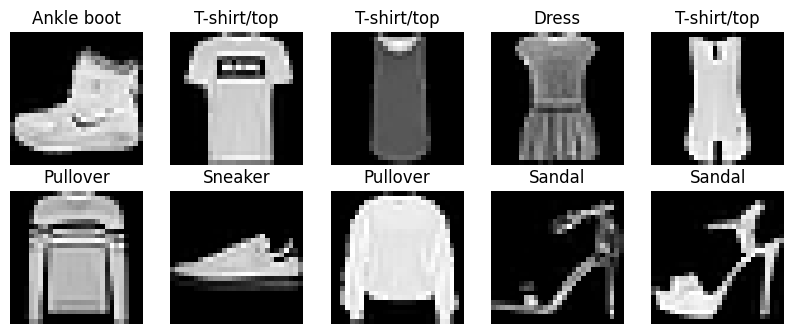

In [19]:
""" 2. Роздрукувати 10 зображень. """
import matplotlib.pyplot as plt

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.show()


In [20]:
""" 3. Підготовувати дані, побудувати архітектуру. 
4. Використати ранню зупинку і зменшення швидкості для запобіганню
перенавчанню.
5. Вивести архітектуру моделі
"""
from keras import layers

train_images = train_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255
train_labels_cat = keras.utils.to_categorical(train_labels)
test_labels_cat = keras.utils.to_categorical(test_labels)

inputs = keras.Input(shape=(28, 28))
x = layers.Flatten()(inputs)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="fashion_mnist_model")
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.summary()
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.2, patience=3, min_lr=0.001
)

history = model.fit(
    train_images, train_labels_cat,
    batch_size=64,
    epochs=50,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr]
)

test_loss, test_acc = model.evaluate(test_images, test_labels_cat, verbose=2)
print(f"\nТочність на тестових даних: {test_acc:.4f}")


Model: "fashion_mnist_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7615 - loss: 0.7114 - val_accuracy: 0.8538 - val_loss: 0.4139 - learning_rate: 0.0010
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8570 - loss: 0.4071 - val_accuracy: 0.8618 - val_loss: 0.3881 - learning_rate: 0.0010
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8743 - loss: 0.3465 - val_accuracy: 0.8612 - val_loss: 0.3754 - learning_rate: 0.0010
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8791 - loss: 0.3303 - val_accuracy: 0.8763 - val_loss: 0.3412 - learning_rate: 0.0010
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8854 - loss: 0.3070 - val_accuracy: 0.8811 - val_loss: 0.3324 - learning_rate: 0.0010
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8945 - loss: 0.2825 - val_accuracy: 0.8800 - val_loss: 0.3358 - learning_rate: 0.0010
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8976 - loss: 0.2768 - 

In [21]:
""" Зберегти модель на гугл диск. """
from google.colab import drive
drive.mount('/content/drive')
model.save('/content/drive/My Drive/fashion_mnist_model.keras')
print("Модель збережено на Google Drive")

ModuleNotFoundError: No module named 'google.colab'

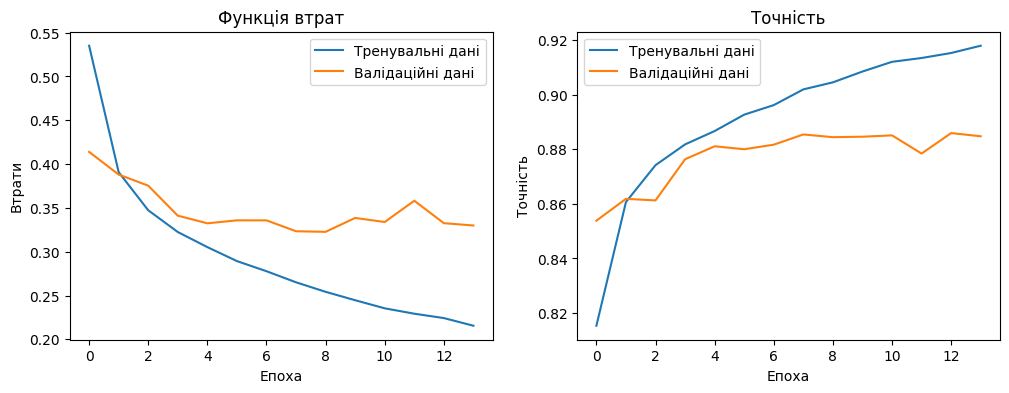

In [22]:
""" 7. Побудувати графіки функції втрат і точності для тренувальних і
тестових даних """
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Тренувальні дані')
plt.plot(history.history['val_loss'], label='Валідаційні дані')
plt.title('Функція втрат')
plt.xlabel('Епоха')
plt.ylabel('Втрати')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Тренувальні дані')
plt.plot(history.history['val_accuracy'], label='Валідаційні дані')
plt.title('Точність')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend()
plt.show()

In [25]:
""" 8. Вивести класифікаційний звіт. """
from sklearn.metrics import classification_report
import numpy as np
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
print("\nКласифікаційний звіт:")
print(classification_report(test_labels, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step

Класифікаційний звіт:
              precision    recall  f1-score   support

           0       0.86      0.79      0.83      1000
           1       0.97      0.98      0.97      1000
           2       0.76      0.83      0.79      1000
           3       0.86      0.90      0.88      1000
           4       0.79      0.81      0.80      1000
           5       0.96      0.96      0.96      1000
           6       0.75      0.67      0.70      1000
           7       0.94      0.94      0.94      1000
           8       0.96      0.97      0.96      1000
           9       0.94      0.96      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



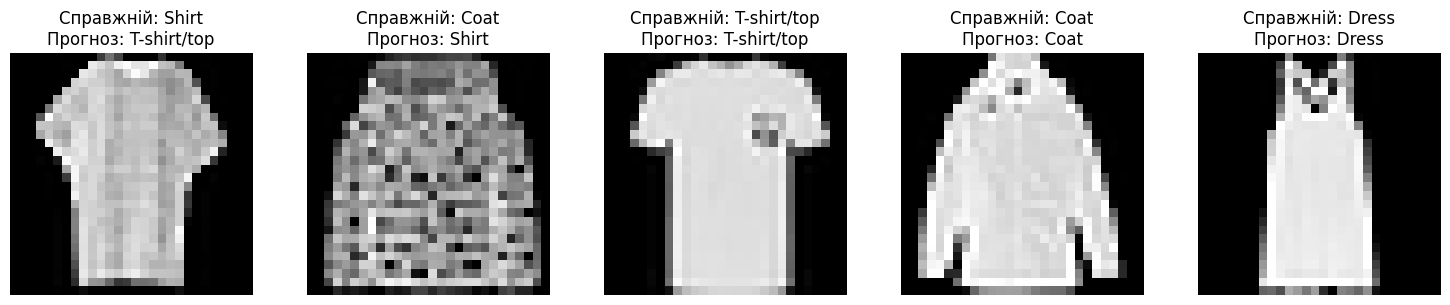

In [26]:
""" 9. Результати розпізнавання із прогнозованим і справжнім класом """
num_samples = 5
random_indices = np.random.choice(len(test_images), num_samples, replace=False)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(15, 3))
for i, index in enumerate(random_indices):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(test_images[index], cmap='gray')
    true_label = class_names[test_labels[index]]
    pred_label = class_names[y_pred_classes[index]]
    plt.title(f"Справжній: {true_label}\nПрогноз: {pred_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()